# Bitcoin Price Prediction using LSTM

This notebook implements an LSTM (Long Short-Term Memory) model to predict Bitcoin prices using historical data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Load and preprocess the data
df = pd.read_csv('bitcoin.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select features for prediction
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = df[features]

# Scale the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

print('Data shape:', scaled_data.shape)

Data shape: (2713, 5)


In [3]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 3])  # Predict Close price
    return np.array(X), np.array(y)

# Create sequences for LSTM
sequence_length = 60  # Use 60 days of historical data to predict the next day
X, y = create_sequences(scaled_data, sequence_length)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (2122, 60, 5)
Testing set shape: (531, 60, 5)


In [4]:
# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, len(features))),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)          │        11,200 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)          │             0 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)              │        20,200 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)              │             0 │
├─────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)               │            51 │
└─────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0028 - val_loss: 1.5917e-04
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.7055e-04 - val_loss: 1.5363e-04
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.1137e-04 - val_loss: 1.5049e-04
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.0488e-04 - val_loss: 1.3961e-04
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.6128e-04 - val_loss: 1.5286e-04
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.8144e-04 - val_loss: 1.3331e-04
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.5066e-04 - val_loss: 1.3919e-04
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.7275e-04 - val_loss: 1.3080e-04
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.6928e-04 - val_loss: 1.1986e-04
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.8226e-04 - val_loss: 9.9984e-05
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 1.4004e-04 - 

Final Training Loss: 0.00012412993237376213
Final Validation Loss: 7.030778215266764e-05
Loss Difference (Training - Validation): 5.382215022109449e-05


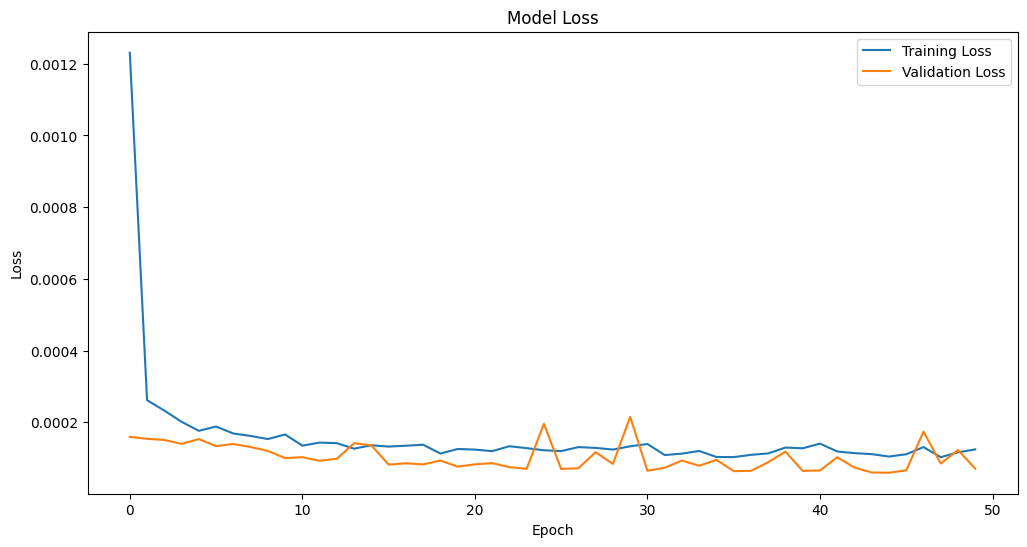

In [9]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

final_training_loss = training_loss[-1]
final_validation_loss = validation_loss[-1]

print(f'Final Training Loss: {final_training_loss}')
print(f'Final Validation Loss: {final_validation_loss}')
loss_difference = final_training_loss - final_validation_loss
print(f'Loss Difference (Training - Validation): {loss_difference}')

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step 


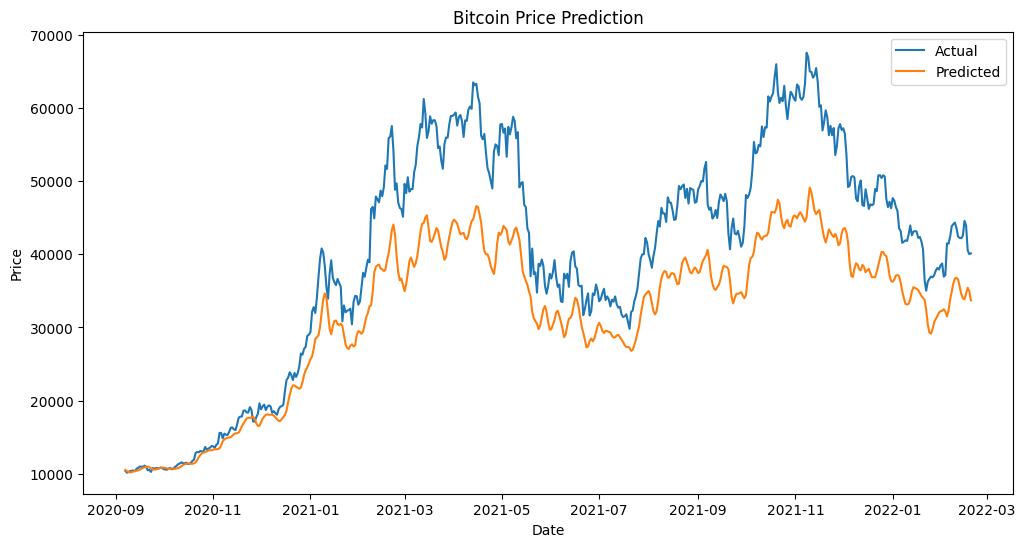

In [7]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform predictions
y_test_inv = scaler.inverse_transform(np.repeat(y_test.reshape(-1, 1), len(features), axis=1))[:, 3]
y_pred_inv = scaler.inverse_transform(np.repeat(y_pred, len(features), axis=1))[:, 3]

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size+sequence_length:], y_test_inv, label='Actual')
plt.plot(df.index[train_size+sequence_length:], y_pred_inv, label='Predicted')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\BiggSha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


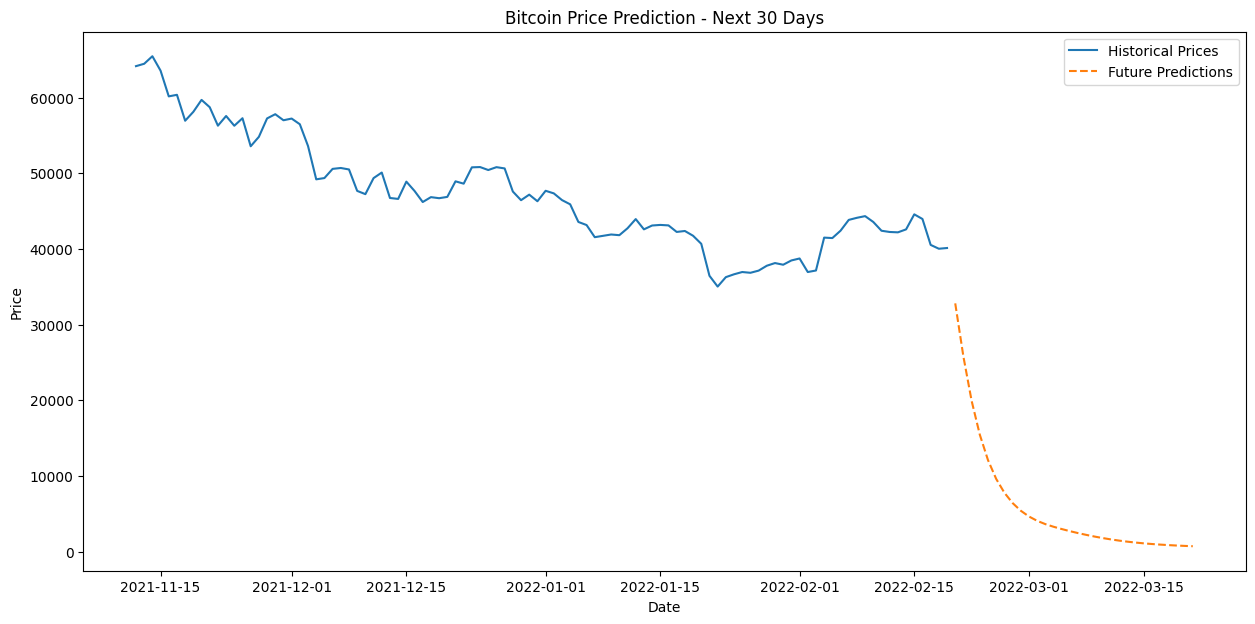

In [8]:
# Predict future prices
last_sequence = scaled_data[-sequence_length:]
future_days = 30

future_predictions = []
current_sequence = last_sequence

for _ in range(future_days):
    # Reshape the sequence for prediction
    current_sequence_reshaped = current_sequence.reshape(1, sequence_length, len(features))
    
    # Get the prediction
    next_pred = model.predict(current_sequence_reshaped)
    
    # Create the next sequence
    next_seq = np.zeros((1, len(features)))
    next_seq[0, 3] = next_pred[0, 0]  # Set predicted close price
    next_seq = scaler.inverse_transform(next_seq)
    
    future_predictions.append(next_seq[0, 3])
    
    # Update current sequence
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = scaler.transform(next_seq)[0]

# Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# Plot historical and future predictions
plt.figure(figsize=(15, 7))
plt.plot(df.index[-100:], df['Close'][-100:], label='Historical Prices')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('Bitcoin Price Prediction - Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()